In [553]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [554]:
df_pozos_data = pd.read_csv('./data/capitulo-iv-pozos.csv')
df_pozos_general_2024 = pd.read_csv('./data/produccin-de-pozos-de-gas-y-petrleo-2024.csv', low_memory=False)
df_pozos_noconvencional = pd.read_csv('./data/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv', low_memory=False)

df_pozos_noconvencional_2024 = df_pozos_noconvencional[df_pozos_noconvencional['anio'] == 2024]
df_pozos_convencional_2024= df_pozos_general_2024[df_pozos_general_2024['tipo_de_recurso'] == 'CONVENCIONAL']

delgeneral_pozos_noconvencional_2024= df_pozos_general_2024[df_pozos_general_2024['tipo_de_recurso'] == 'NO CONVENCIONAL']


In [555]:
df_pozos_noconvencional_2024.shape

(40080, 40)

In [556]:
delgeneral_pozos_noconvencional_2024.shape

(40111, 38)

Hay 31 casos que no están en el dataset de pozos no convencionales pero sí en el de pozos generales.

D) Efectuar un análisis descriptivo de la producción de petróleo y gas tanto para los pozos
convencionales como los no convencionales para el año 2024.Efectuar el análisis de
petróleo y gas por separado. 

In [557]:
def formato_espanol(valor):
    return f"{valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

### Detalle total de la producción de petroleo por método de extracción:

In [558]:
# Crear Series con las producciones por método
prod_p_conv_por_extraccion = df_pozos_convencional_2024.groupby('tipoextraccion')['prod_pet'].sum()
prod_p_noconv_por_extraccion = df_pozos_noconvencional_2024.groupby('tipoextraccion')['prod_pet'].sum()

# Combinar en un DataFrame
df_prod_p_total = pd.DataFrame({
    'convencional': prod_p_conv_por_extraccion,
    'no_convencional': prod_p_noconv_por_extraccion
}).fillna(0)  # Rellenar NaN con 0 para métodos que no aparezcan en uno de los dos

# Calcular la producción total
df_prod_p_total['total'] = df_prod_p_total['convencional'] + df_prod_p_total['no_convencional']


print(df_prod_p_total.map(formato_espanol))


                           convencional no_convencional          total
tipoextraccion                                                        
Bombeo Hidráulico                  0,00        2.040,92       2.040,92
Bombeo Mecánico            6.752.940,03    1.545.947,92   8.298.887,95
Cavidad Progresiva         3.587.958,14            0,00   3.587.958,14
Electrosumergible          3.821.557,39       69.479,00   3.891.036,39
Gas Lift                      79.133,98    1.552.900,33   1.632.034,31
Jet Pump                      11.919,92        3.143,95      15.063,87
Otros Tipos de Extracción      3.584,45            0,00       3.584,45
Pistoneo (Swabbing)           15.631,56            0,00      15.631,56
Plunger Lift                  57.007,92      120.654,38     177.662,31
Sin Sistema de Extracción     26.487,46      200.407,13     226.894,59
Surgencia Natural            884.529,15   15.135.483,72  16.020.012,87


### Totales de producción de petróleo:

In [559]:
prod_p_conv_total=sum(df_prod_p_total['convencional'])
prod_p_noconv_total=sum(df_prod_p_total['no_convencional'])
prod_p_total=prod_p_conv_total+prod_p_noconv_total

print(f'Producción de petróleo convencional: {prod_p_conv_total:,.2f} m3'.replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f'Producción de petróleo no convencional: {prod_p_noconv_total:,.2f} m3'.replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f'Producción de petróleo total: {prod_p_total:,.2f} m3'.replace(',', 'X').replace('.', ',').replace('X', '.'))

Producción de petróleo convencional: 15.240.750,03 m3
Producción de petróleo no convencional: 18.630.057,34 m3
Producción de petróleo total: 33.870.807,37 m3


### Detalle total de la producción de gas por método de extracción:

In [560]:
# Crear Series con las producciones por método
prod_g_conv_por_extraccion = df_pozos_convencional_2024.groupby('tipoextraccion')['prod_gas'].sum()
prod_g_noconv_por_extraccion = df_pozos_noconvencional_2024.groupby('tipoextraccion')['prod_gas'].sum()

# Combinar en un DataFrame
df_prod_g_total = pd.DataFrame({
    'convencional': prod_g_conv_por_extraccion,
    'no_convencional': prod_g_noconv_por_extraccion
}).fillna(0)  # Rellenar NaN con 0 para métodos que no aparezcan en uno de los dos

# Calcular la producción total
df_prod_g_total['total'] = df_prod_g_total['convencional'] + df_prod_g_total['no_convencional']


print(df_prod_g_total.map(formato_espanol))

                            convencional no_convencional          total
tipoextraccion                                                         
Bombeo Hidráulico                   0,00          138,37         138,37
Bombeo Mecánico             1.807.005,25      218.439,83   2.025.445,08
Cavidad Progresiva            116.393,81            0,00     116.393,81
Electrosumergible             200.949,05       10.621,49     211.570,54
Gas Lift                      124.532,30      287.073,27     411.605,57
Jet Pump                          364,19          383,31         747,50
Otros Tipos de Extracción       1.993,08            0,00       1.993,08
Pistoneo (Swabbing)               264,50            0,00         264,50
Plunger Lift                  221.833,88      391.524,42     613.358,30
Sin Sistema de Extracción     959.157,64      520.527,32   1.479.684,96
Surgencia Natural          12.321.564,61   25.856.264,41  38.177.829,02


### Totales de producción de gas:

In [561]:
prod_g_conv_total=sum(df_prod_g_total['convencional'])
prod_g_noconv_total=sum(df_prod_g_total['no_convencional'])
prod_g_total=prod_g_conv_total+prod_g_noconv_total

print(f'Producción de gas convencional: {prod_g_conv_total:,.2f} miles de m3'.replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f'Producción de gas no convencional: {prod_g_noconv_total:,.2f} miles de m3'.replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f'Producción de gas total: {prod_g_total:,.2f} miles de m3'.replace(',', 'X').replace('.', ',').replace('X', '.'))

Producción de gas convencional: 15.754.058,32 miles de m3
Producción de gas no convencional: 27.284.972,41 miles de m3
Producción de gas total: 43.039.030,73 miles de m3


### Producción de petróleo por clasificación

In [562]:
prod_p_conv_por_clasificacion= df_pozos_convencional_2024.groupby('clasificacion')['prod_pet'].sum()
prod_p_noconv_por_clasificacion= df_pozos_noconvencional_2024.groupby('clasificacion')['prod_pet'].sum()
df_prod_p_total_por_clasificacion = pd.DataFrame({
    'convencional': prod_p_conv_por_clasificacion,
    'no_convencional': prod_p_noconv_por_clasificacion
}).fillna(0)

df_prod_p_total_por_clasificacion['total'] = df_prod_p_total_por_clasificacion['convencional'] + df_prod_p_total_por_clasificacion['no_convencional']


print(df_prod_p_total_por_clasificacion.map(formato_espanol))

                 convencional no_convencional          total
clasificacion                                               
ALMACENAMIENTO      19.808,51            0,00      19.808,51
EXPLORACION        430.767,68      361.712,87     792.480,54
EXPLOTACION     12.401.844,11   18.267.993,17  30.669.837,28
SERVICIO            68.050,99            0,00      68.050,99


### Producción de gas por clasificación

In [563]:
prod_g_conv_por_clasificacion= df_pozos_convencional_2024.groupby('clasificacion')['prod_gas'].sum()
prod_g_noconv_por_clasificacion= df_pozos_noconvencional_2024.groupby('clasificacion')['prod_gas'].sum()
df_prod_g_total_por_clasificacion = pd.DataFrame({
    'convencional': prod_g_conv_por_clasificacion,
    'no_convencional': prod_g_noconv_por_clasificacion
}).fillna(0)

df_prod_g_total_por_clasificacion['total'] = df_prod_g_total_por_clasificacion['convencional'] + df_prod_g_total_por_clasificacion['no_convencional']


print(df_prod_g_total_por_clasificacion.map(formato_espanol))

                convencional no_convencional          total
clasificacion                                              
ALMACENAMIENTO     10.123,12            0,00      10.123,12
EXPLORACION     1.400.876,21      438.532,22   1.839.408,43
EXPLOTACION     9.610.387,99   26.842.278,55  36.452.666,54
SERVICIO          121.715,30            0,00     121.715,30


### Producción de petroleo por mes del año

In [564]:
prod_p_conv_por_mes= df_pozos_convencional_2024.groupby('mes')['prod_pet'].sum()
prod_p_noconv_por_mes= df_pozos_noconvencional_2024.groupby('mes')['prod_pet'].sum()
df_prod_p_total_por_mes= pd.DataFrame({
    'convencional': prod_p_conv_por_mes,
    'no_convencional': prod_p_noconv_por_mes
}).fillna(0)

df_prod_p_total_por_mes['total'] = df_prod_p_total_por_mes['convencional'] + df_prod_p_total_por_mes['no_convencional']


print(df_prod_p_total_por_mes.map(formato_espanol))

     convencional no_convencional         total
mes                                            
1    1.619.308,18    1.730.193,70  3.349.501,88
2    1.486.482,50    1.651.045,87  3.137.528,37
3    1.591.073,28    1.802.195,27  3.393.268,55
4    1.538.022,55    1.759.161,18  3.297.183,73
5    1.580.973,50    1.834.969,47  3.415.942,97
6    1.386.820,31    1.810.154,68  3.196.974,98
7    1.441.182,76    1.933.436,63  3.374.619,39
8    1.529.084,11    2.015.479,48  3.544.563,58
9    1.509.090,49    2.025.337,39  3.534.427,89
10   1.558.712,35    2.068.083,69  3.626.796,03


### Producción de gas por mes del año

In [565]:
prod_g_conv_por_mes= df_pozos_convencional_2024.groupby('mes')['prod_gas'].sum()
prod_g_noconv_por_mes= df_pozos_noconvencional_2024.groupby('mes')['prod_gas'].sum()
df_prod_g_total_por_mes = pd.DataFrame({
    'convencional': prod_g_conv_por_mes,
    'no_convencional': prod_g_noconv_por_mes
}).fillna(0)

df_prod_g_total_por_mes['total'] = df_prod_g_total_por_mes['convencional'] + df_prod_g_total_por_mes['no_convencional']


print(df_prod_g_total_por_mes.map(formato_espanol))

     convencional no_convencional         total
mes                                            
1    1.532.240,72    2.305.711,68  3.837.952,40
2    1.543.557,37    2.344.104,71  3.887.662,08
3    1.629.323,71    2.545.116,55  4.174.440,26
4    1.567.799,62    2.517.001,23  4.084.800,85
5    1.634.483,04    3.019.848,23  4.654.331,26
6    1.537.554,76    2.888.619,29  4.426.174,05
7    1.557.070,43    3.150.927,68  4.707.998,11
8    1.591.864,73    3.150.430,44  4.742.295,17
9    1.540.461,99    2.873.198,02  4.413.660,02
10   1.619.701,95    2.490.014,57  4.109.716,52


### Producción de petróleo por empresa

In [566]:
df_pozos_convencional_2024['empresa'].unique()

array(['PETROLERA DEL COMAHUE S.A.', 'YPF S.A.',
       'VISTA ENERGY ARGENTINA SAU', 'VENOIL S.A.', 'TECPETROL S.A.',
       'TOTAL AUSTRAL S.A.', 'SELVA MARIA OIL S.A.',
       'SAN JORGE PETROLEUM S.A.', 'ENAP SIPETROL ARGENTINA S.A.',
       'SHELL ARGENTINA S.A.', 'COPESA CIA CONSTRUCTORA PETROLERA SA',
       'ROCH S.A.', 'RECURSOS Y ENERGIA FORMOSA S.A.',
       'QUINTANA E&P ARGENTINA S.R.L.', 'PETROLERA EL TREBOL S.A.',
       'PETROMINERA CHUBUT S.E.', 'PETROLERA SAN MIGUEL S.A.',
       'PETROLEOS SUDAMERICANOS S.A.', 'PRESIDENT PETROLEUM S.A.',
       'PETROLERA PAMPA S.A. ', 'PLUSPETROL ENERGY S.A.',
       'PLUSPETROL S.A.', 'Pilgrim Energy S.A.',
       'PETROLSUR ENERGIA S.A. ', 'PATAGONIA ENERGY S.A.',
       'PETROQUIMICA COMODORO RIVADAVIA S.A.',
       'PATAGONIA RESOURCES S.A. ', 'PAMPETROL S.A.P.E.M',
       'PAMPA ENERGIA S.A.', 'PAN AMERICAN ENERGY SL',
       'OILSTONE ENERGIA S.A.', 'MEDANITO S.A.', 'KILWER S.A.',
       'JUJUY HIDROCARBUROS SAU', 'INGENIERIA 

In [567]:
prod_p_conv_por_empresa= df_pozos_convencional_2024.groupby('empresa')['prod_pet'].sum()
prod_p_noconv_por_empresa= df_pozos_noconvencional_2024.groupby('empresa')['prod_pet'].sum()
df_prod_p_total_por_empresa= pd.DataFrame({
    'convencional': prod_p_conv_por_empresa,
    'no_convencional': prod_p_noconv_por_empresa
}).fillna(0)

df_prod_p_total_por_empresa['total'] = df_prod_p_total_por_empresa['convencional'] + df_prod_p_total_por_empresa['no_convencional']


print(df_prod_p_total_por_empresa.map(formato_espanol))

                                           convencional no_convencional  \
empresa                                                                   
ALIANZA PETROLERA ARGENTINA S.A.               1.172,62            0,00   
ARGENTA ENERGIA S.A.                               0,00            0,00   
CAPETROL ARGENTINA S.A.                        1.025,00            0,00   
CAPETROL S.A.                                  1.274,00            0,00   
CAPEX S.A.                                   397.922,01       72.674,50   
CGC ENERGIA SAU                              848.971,30       31.330,40   
CHEVRON ARGENTINA S.R.L.                     124.007,04      181.009,14   
COLHUE HUAPI S.A.                             15.892,00            0,00   
COMPAÑÍA GENERAL DE COMBUSTIBLES S.A.         81.796,37       25.388,75   
COMPAÑÍAS ASOCIADAS PETROLERAS S.A.          510.442,02            0,00   
COPESA CIA CONSTRUCTORA PETROLERA SA               0,00            0,00   
CROWN POINT ENERGIA S.A. 

### Producción de gas por empresa

In [568]:
prod_g_conv_por_empresa= df_pozos_convencional_2024.groupby('empresa')['prod_gas'].sum()
prod_g_noconv_por_empresa= df_pozos_noconvencional_2024.groupby('empresa')['prod_gas'].sum()
df_prod_g_total_por_empresa= pd.DataFrame({
    'convencional': prod_g_conv_por_empresa,
    'no_convencional': prod_g_noconv_por_empresa
}).fillna(0)

df_prod_g_total_por_empresa['total'] = df_prod_g_total_por_empresa['convencional'] + df_prod_g_total_por_empresa['no_convencional']


print(df_prod_g_total_por_empresa.map(formato_espanol))

                                           convencional no_convencional  \
empresa                                                                   
ALIANZA PETROLERA ARGENTINA S.A.              10.338,50            0,00   
ARGENTA ENERGIA S.A.                               0,00            0,00   
CAPETROL ARGENTINA S.A.                        1.947,00            0,00   
CAPETROL S.A.                                      0,00            0,00   
CAPEX S.A.                                   290.413,45      221.610,51   
CGC ENERGIA SAU                              497.336,85       85.338,10   
CHEVRON ARGENTINA S.R.L.                      41.590,89       85.115,73   
COLHUE HUAPI S.A.                                984,80            0,00   
COMPAÑÍA GENERAL DE COMBUSTIBLES S.A.        416.697,83      869.052,56   
COMPAÑÍAS ASOCIADAS PETROLERAS S.A.           26.743,62            0,00   
COPESA CIA CONSTRUCTORA PETROLERA SA               0,00            0,00   
CROWN POINT ENERGIA S.A. 

### Producción de petróleo por tipo de pozo

In [569]:
prod_p_conv_por_tipopozo= df_pozos_convencional_2024.groupby('tipopozo')['prod_pet'].sum()
prod_p_noconv_por_tipopozo= df_pozos_noconvencional_2024.groupby('tipopozo')['prod_pet'].sum()
df_prod_p_total_por_tipopozo= pd.DataFrame({
    'convencional': prod_p_conv_por_tipopozo,
    'no_convencional': prod_p_noconv_por_tipopozo
}).fillna(0)

df_prod_p_total_por_tipopozo['total'] = df_prod_p_total_por_tipopozo['convencional'] + df_prod_p_total_por_tipopozo['no_convencional']

print(df_prod_p_total_por_tipopozo.map(formato_espanol))

                                  convencional no_convencional          total
tipopozo                                                                     
Acuífero                                396,36            0,00         396,36
Bidireccional de almacenamiento           0,00            0,00           0,00
Gasífero                            802.118,93    1.488.342,71   2.290.461,64
Inyección de Agua                       301,93            0,00         301,93
Inyección de Gas                          0,00            0,00           0,00
Inyector de almacenamiento                0,00            0,00           0,00
Monitoreo de almacenamiento               0,00            0,00           0,00
Otro tipo                             4.670,60            0,00       4.670,60
Petrolífero                      14.433.262,21   17.141.714,63  31.574.976,85
Sumidero                                  0,00            0,00           0,00


### Producción de gas por tipo de pozo

In [570]:
prod_g_conv_por_tipopozo= df_pozos_convencional_2024.groupby('tipopozo')['prod_gas'].sum()
prod_g_noconv_por_tipopozo= df_pozos_noconvencional_2024.groupby('tipopozo')['prod_gas'].sum()
df_prod_g_total_por_tipopozo= pd.DataFrame({
    'convencional': prod_g_conv_por_tipopozo,
    'no_convencional': prod_g_noconv_por_tipopozo
}).fillna(0)

df_prod_g_total_por_tipopozo['total'] = df_prod_g_total_por_tipopozo['convencional'] + df_prod_g_total_por_tipopozo['no_convencional']


print(df_prod_g_total_por_tipopozo.map(formato_espanol))

                                  convencional no_convencional          total
tipopozo                                                                     
Acuífero                              3.950,20            0,00       3.950,20
Bidireccional de almacenamiento           0,00            0,00           0,00
Gasífero                         12.680.620,00   24.616.971,49  37.297.591,49
Inyección de Agua                       107,40            0,00         107,40
Inyección de Gas                          0,00            0,00           0,00
Inyector de almacenamiento                0,00            0,00           0,00
Monitoreo de almacenamiento               0,00            0,00           0,00
Otro tipo                             2.432,21            0,00       2.432,21
Petrolífero                       3.066.948,51    2.668.000,92   5.734.949,43
Sumidero                                  0,00            0,00           0,00


### Producción de petróleo por provincia

##### Renombramos a Estado Nacional como: 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' porque vimos que son coordenadas que responden a territorio de ultramar, generalmente cerca de la Antártida

In [571]:
df_replace_pozos_convencional_2024= df_pozos_convencional_2024.replace('Estado Nacional','Tierra del Fuego')
df_replace_pozos_noconvencional_2024= df_pozos_noconvencional_2024.replace('Estado Nacional','Tierra del Fuego')

df_replace_pozos_convencional_2024= df_replace_pozos_convencional_2024.replace('Tierra del Fuego','Tierra del Fuego, Antártida e Islas del Atlántico Sur')
df_replace_pozos_noconvencional_2024= df_replace_pozos_noconvencional_2024.replace('Tierra del Fuego','Tierra del Fuego, Antártida e Islas del Atlántico Sur')

In [572]:

prod_p_conv_por_provincia= df_replace_pozos_convencional_2024.groupby('provincia')['prod_pet'].sum()
prod_p_noconv_por_provincia= df_replace_pozos_noconvencional_2024.groupby('provincia')['prod_pet'].sum()


df_prod_p_total_por_provincia= pd.DataFrame({
    'convencional': prod_p_conv_por_provincia,
    'no_convencional': prod_p_noconv_por_provincia
}).fillna(0)

df_prod_p_total_por_provincia['total'] = df_prod_p_total_por_provincia['convencional'] + df_prod_p_total_por_provincia['no_convencional']

df_prod_p_total_por_provincia= df_prod_p_total_por_provincia.replace('Tierra del Fuego','Tierra del Fuego, Antártida e Islas del Atlántico Sur')

print(df_prod_p_total_por_provincia.map(formato_espanol))

                                                    convencional  \
provincia                                                          
Chubut                                              6.168.385,12   
Formosa                                                29.351,38   
Jujuy                                                   8.225,93   
La Pampa                                              612.728,95   
Mendoza                                             2.695.190,95   
Neuquén                                             1.240.735,23   
Rio Negro                                             870.591,87   
Salta                                                 131.035,70   
Santa Cruz                                          3.141.442,03   
Tierra del Fuego, Antártida e Islas del Atlánti...    343.062,87   

                                                   no_convencional  \
provincia                                                            
Chubut                                     

### Producción de gas por provincia

In [573]:
prod_g_conv_por_provincia= df_replace_pozos_convencional_2024.groupby('provincia')['prod_gas'].sum()
prod_g_noconv_por_provincia= df_replace_pozos_noconvencional_2024.groupby('provincia')['prod_gas'].sum()
df_prod_g_total_por_provincia= pd.DataFrame({
    'convencional': prod_g_conv_por_provincia,
    'no_convencional': prod_g_noconv_por_provincia
}).fillna(0)

df_prod_g_total_por_provincia['total'] = df_prod_g_total_por_provincia['convencional'] + df_prod_g_total_por_provincia['no_convencional']


print(df_prod_g_total_por_provincia.map(formato_espanol))

                                                    convencional  \
provincia                                                          
Chubut                                              2.162.279,66   
Formosa                                                 4.270,00   
Jujuy                                                   2.334,04   
La Pampa                                              183.202,22   
Mendoza                                               430.930,90   
Neuquén                                             3.855.485,90   
Rio Negro                                             550.326,71   
Salta                                               1.024.382,24   
Santa Cruz                                          1.733.612,29   
Tierra del Fuego, Antártida e Islas del Atlánti...  5.807.234,37   

                                                   no_convencional  \
provincia                                                            
Chubut                                     

### Gráficos

In [574]:
argentina_map['NAM'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Neuquén', 'San Luis',
       'Santa Fe', 'Chubut', 'Mendoza', 'Entre Ríoss', 'San Juan',
       'Jujuy', 'Santiago del Estero', 'Río Negro', 'Corrientes',
       'Misiones', 'Salta', 'Córdoba',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Buenos Aires', 'La Pampa', 'La Rioja', 'Catamarca', 'Tucumán',
       'Chaco', 'Formosa', 'Santa Cruz'], dtype=object)

#### Producción de petróleo por provincia, mapa de la Argentina

<Figure size 12000x18000 with 0 Axes>

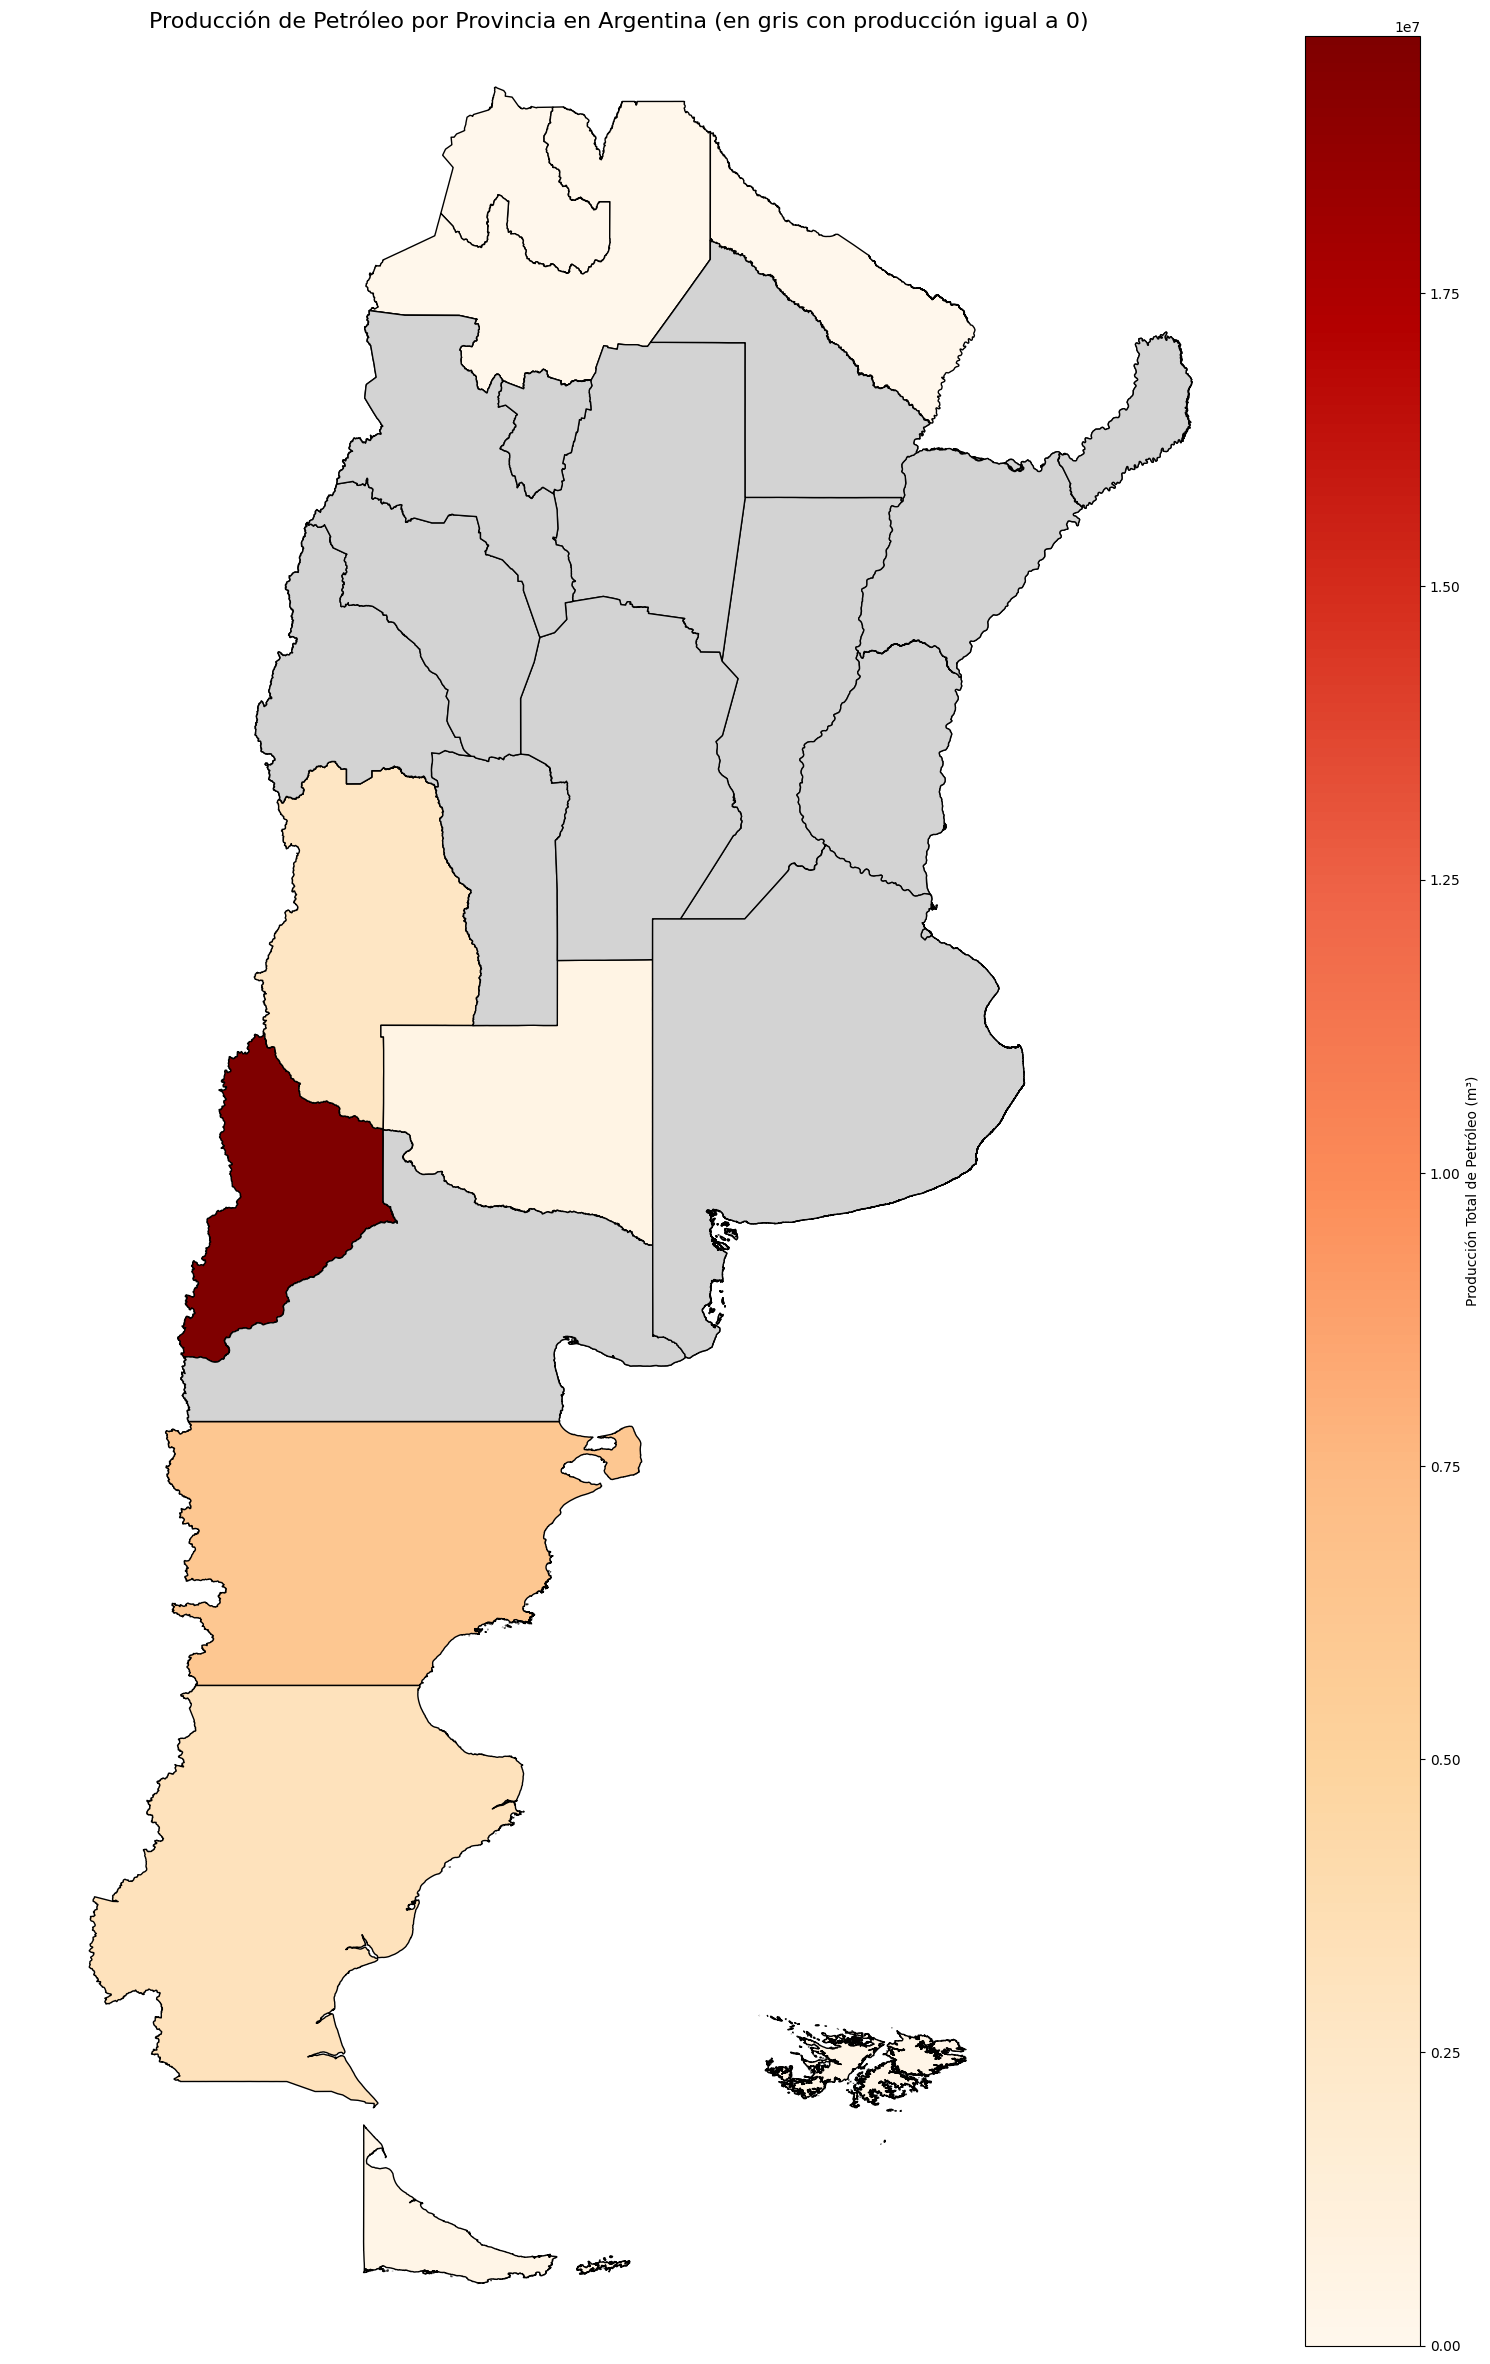

In [575]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al shapefile
shapefile_path = 'C:/Users/ivola/OneDrive/Escritorio/Mapa_Argentina_Bicontinental_QGIS/datos_shp/Provincias.shp'

# Cargar el shapefile
gdf_p_provincias = gpd.read_file(shapefile_path)

# Resetear el índice para tener 'provincia' como columna
df_prod_p_total_por_provincia = df_prod_p_total_por_provincia.reset_index()

# Unir los datos de producción al GeoDataFrame
gdf_p_provincias = gdf_p_provincias.merge(
    df_prod_p_total_por_provincia,
    left_on='NAM',  # Sustituir por la columna que contiene los nombres
    right_on='provincia',
    how='left'  # Mantener todas las provincias, incluso si no tienen datos
)

# Rellenar valores nulos en las columnas de producción
gdf_p_provincias['total'] = gdf_p_provincias['total'].fillna(0)

plt.figure(figsize=(40, 60), dpi=300)

# Crear un mapa de calor basado en la columna 'total'
ax = gdf_p_provincias.plot(
    column='total',
    cmap='OrRd',  # Escala de colores
    legend=True,
    legend_kwds={'label': "Producción Total de Petróleo (m³)"},
    edgecolor='black',
    figsize=(20, 30) #ESTE ES CLAVE
)

# Añadir las provincias con producción 0 en color gris
gdf_p_provincias[gdf_p_provincias['total'] == 0].plot(
    color='lightgray',
    edgecolor='black',
    ax=ax
)

# Ajustar límites (puedes probar diferentes valores para afinar el mapa)
ax.set_xlim(-75, -53)  # Ajusta los valores de longitud
ax.set_ylim(-56, -21)  # Ajusta los valores de latitud

# Configurar título
plt.title("Producción de Petróleo por Provincia en Argentina (en gris con producción igual a 0)", fontsize=16)
plt.axis('off')  # Quitar ejes
plt.show()


(La "Antártida e Islas del Atlántico Sur" están representadas por Tierra del Fuego, cuyas cantidades se juntaron)

#### Producción de gas por provincia, mapa de la Argentina

<Figure size 12000x18000 with 0 Axes>

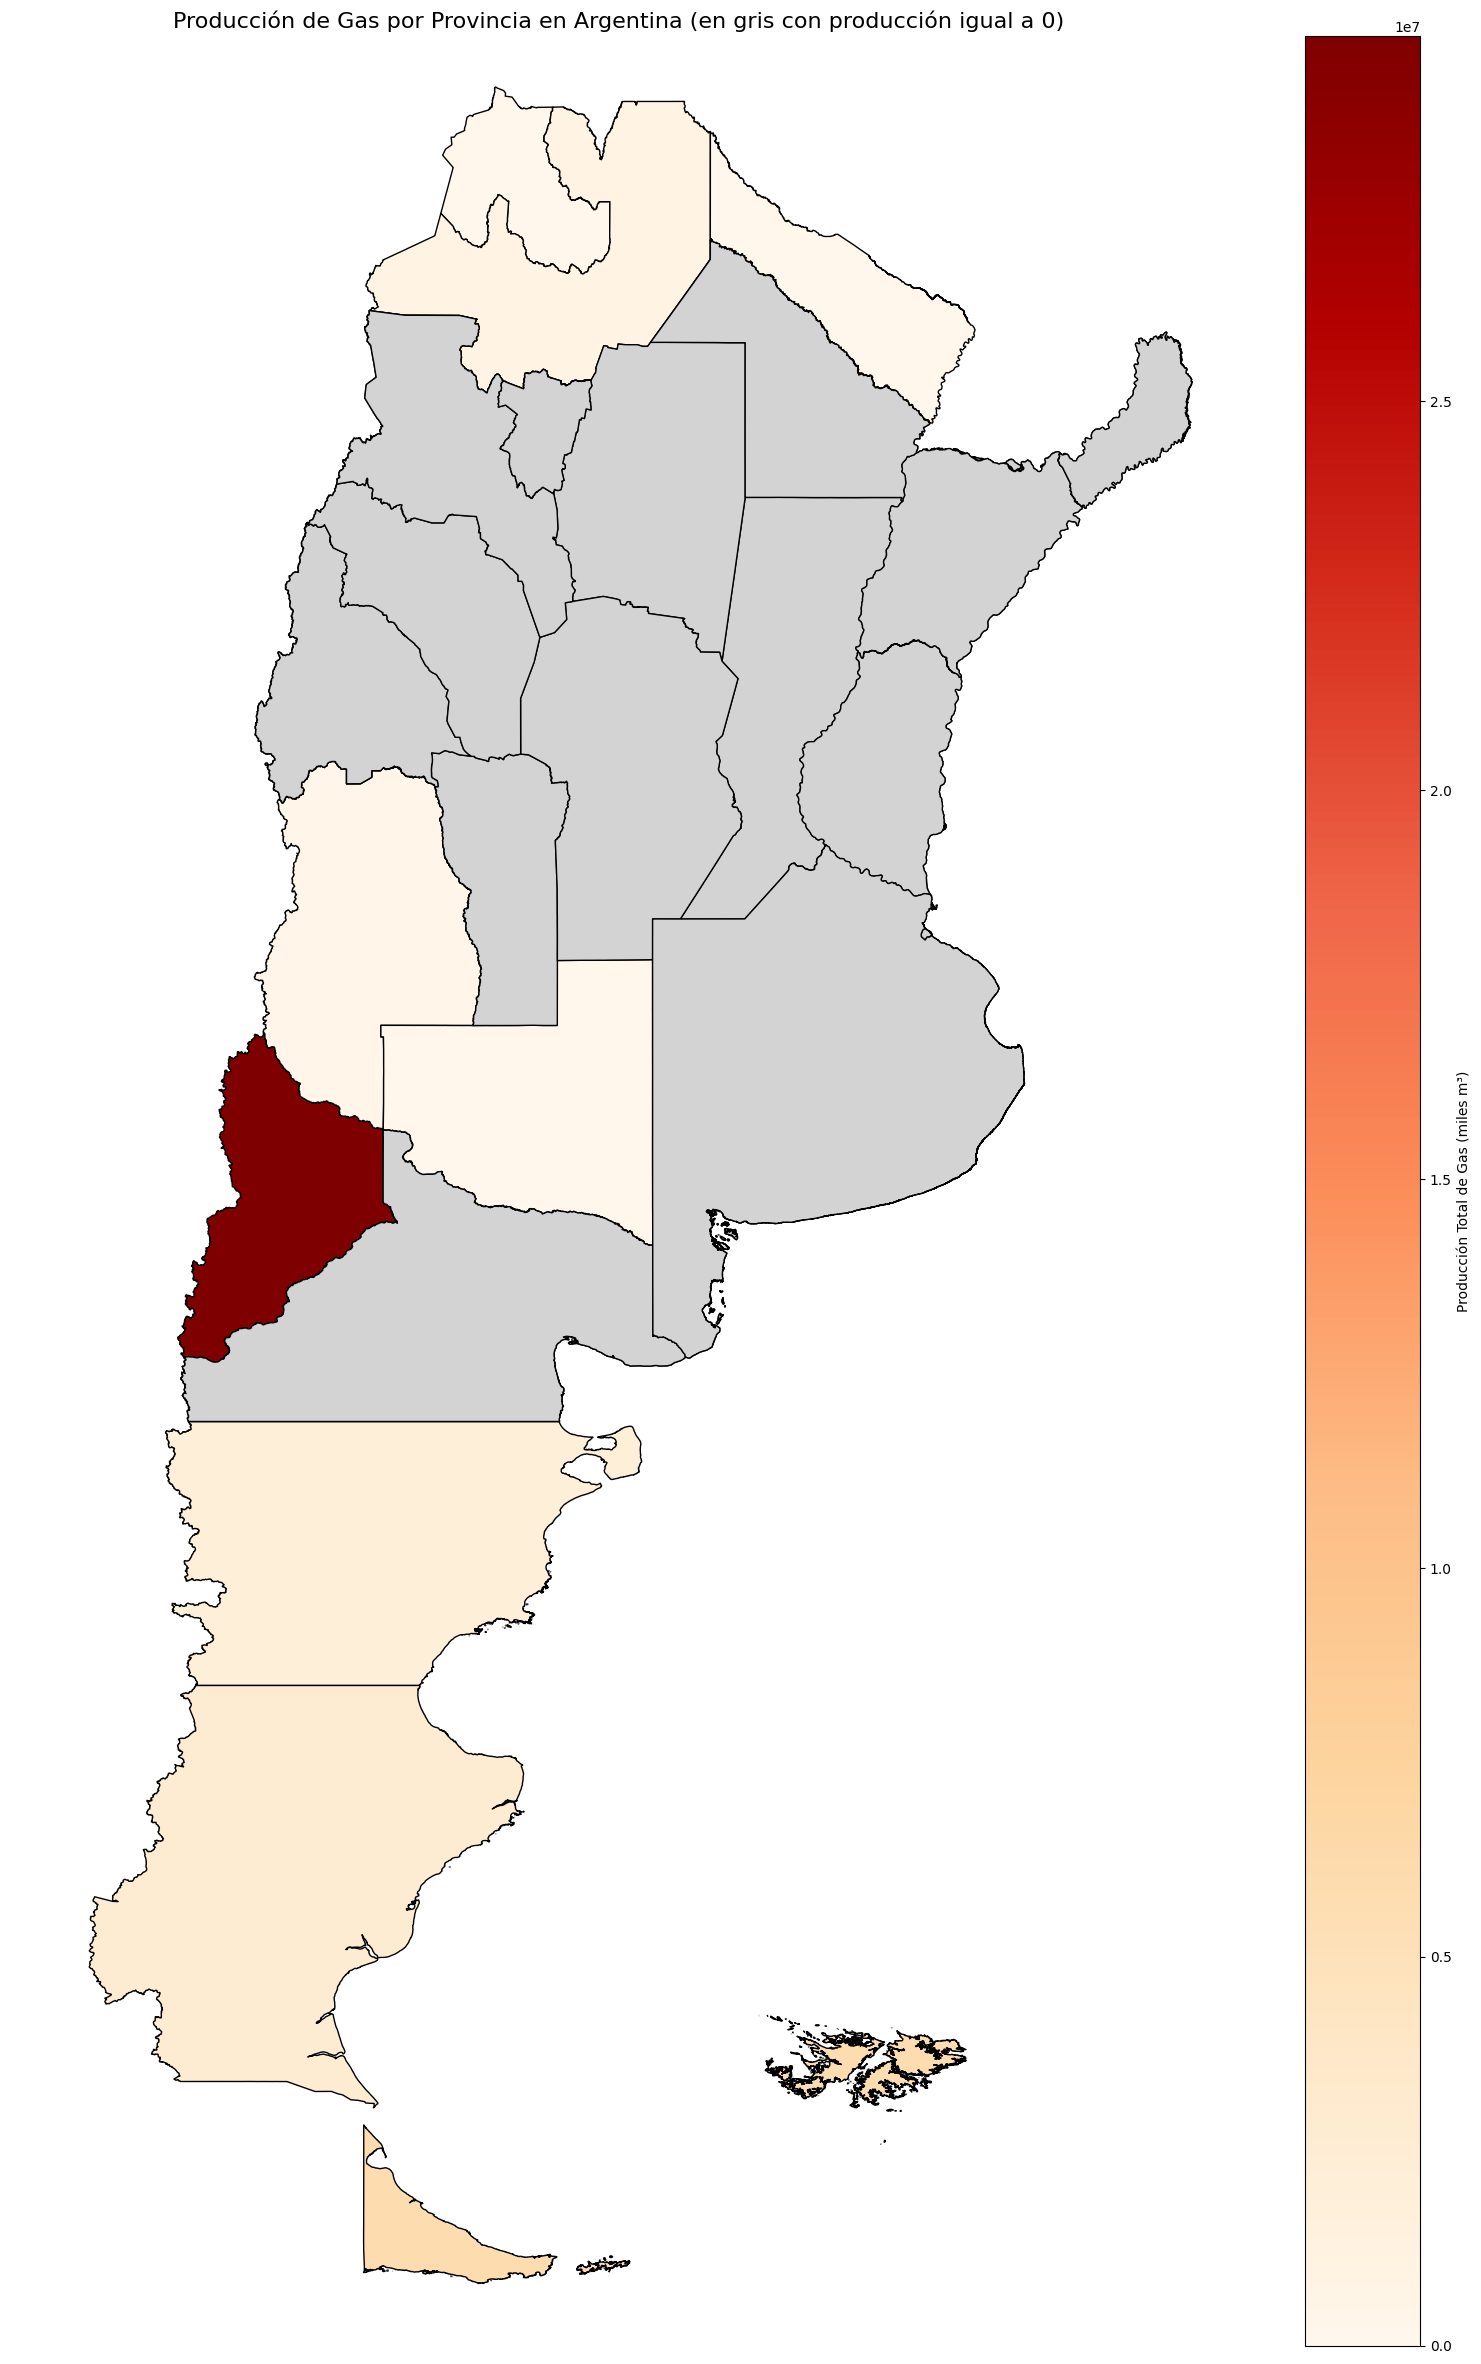

In [577]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al shapefile
shapefile_path = 'C:/Users/ivola/OneDrive/Escritorio/Mapa_Argentina_Bicontinental_QGIS/datos_shp/Provincias.shp'

# Cargar el shapefile
gdf_g_provincias = gpd.read_file(shapefile_path)

# Resetear el índice para tener 'provincia' como columna
df_prod_g_total_por_provincia = df_prod_g_total_por_provincia.reset_index()

# Unir los datos de producción al GeoDataFrame
gdf_g_provincias = gdf_g_provincias.merge(
    df_prod_g_total_por_provincia,
    left_on='NAM',  # Sustituir por la columna que contiene los nombres
    right_on='provincia',
    how='left'  # Mantener todas las provincias, incluso si no tienen datos
)

# Rellenar valores nulos en las columnas de producción
gdf_g_provincias['total'] = gdf_g_provincias['total'].fillna(0)

plt.figure(figsize=(40, 60), dpi=300)

# Crear un mapa de calor basado en la columna 'total'
ax = gdf_g_provincias.plot(
    column='total',
    cmap='OrRd',  # Escala de colores
    legend=True,
    legend_kwds={'label': "Producción Total de Gas (miles m³)"},
    edgecolor='black',
    figsize=(20, 30) #ESTE ES CLAVE
)

# Añadir las provincias con producción 0 en color gris
gdf_g_provincias[gdf_g_provincias['total'] == 0].plot(
    color='lightgray',
    edgecolor='black',
    ax=ax
)

# Ajustar límites (puedes probar diferentes valores para afinar el mapa)
ax.set_xlim(-75, -53)  # Ajusta los valores de longitud
ax.set_ylim(-56, -21)  # Ajusta los valores de latitud

# Configurar título
plt.title("Producción de Gas por Provincia en Argentina (en gris con producción igual a 0)", fontsize=16)
plt.axis('off')  # Quitar ejes
plt.show()


(La "Antártida e Islas del Atlántico Sur" están representadas por Tierra del Fuego, cuyas cantidades se juntaron)